# 🎓 Proyecto: Estadística para Data Science

¡Bienvenido al reto final!

Este proyecto tiene como objetivo integrar y aplicar todas las habilidades estadísticas adquiridas durante el curso. El trabajo se divide en 4 partes:

1.  **Análisis Descriptivo (Dataset Libre):** Exploración profunda de un dataset de tu elección.
2.  **Inferencia y Modelado (Dataset Libre):** Análisis de relaciones y predicción sobre tus datos.
3.  **Regresión Lineal "From Scratch" (NumPy):** Implementación técnica de una regresión lineal simple usando solo matemáticas y NumPy.
4.  **Series Temporales:** Análisis de tendencia y estacionalidad en datos simulados.

---

###  Instrucciones Previas
Antes de comenzar, busca un dataset en [Kaggle](https://www.kaggle.com/) o una fuente confiable. Idealmente, debe tener:
*   Al menos 5 variables (numéricas y categóricas).
*   Un número razonable de filas (+1000).
*   Una variable numérica clara que te gustaría predecir (Target/Y).

**Justificación de decisiones**
* Cada elección relevante (dataset, variables, métricas, supuestos estadísticos, etc.) debe estar brevemente justificada desde un punto de vista estadístico.

**Validación de supuestos**
* Siempre que se aplique un modelo o técnica estadística, se deberán comprobar explícitamente sus supuestos (normalidad, independencia, homocedasticidad, linealidad, estacionariedad, etc., según corresponda).

**Interpretación de resultados**
* No basta con calcular estadísticas o ajustar modelos: los resultados deben ser interpretados en lenguaje claro, conectándolos con el contexto de los datos.

**Reproducibilidad**
* El trabajo debe ser completamente reproducible: cualquier persona debería poder ejecutar el código y obtener los mismos resultados sin modificaciones manuales.


## PARTE 1: Análisis Descriptivo (Dataset Propio)

**Objetivo:** Comprender la naturaleza de tus datos antes de modelar.

**Requisitos:**
1.  **Carga y Vista General:** Importa pandas, carga tu CSV y muestra las primeras filas, info y tipos de datos.
2.  **Clasificación de Variables:** Identifica explícitamente cuáles son Nominales, Ordinales, Discretas y Continuas.
3.  **Estadísticos Descriptivos:** Usa `.describe()` e interpreta la media vs mediana (¿Hay sesgo?).
4.  **Detección de Outliers:** Identifica valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).
5.  **Visualización de Distribuciones:** Plotea histogramas para tus variables principales.

**Conclusión:** Escribe un breve párrafo resumiendo la calidad de tus datos (¿Hay nulos? ¿Outliers? ¿Sesgo?).

-------

**Amplia el analisis:**

- **Análisis de valores nulos**  
  Identifica la cantidad y el porcentaje de valores nulos por variable. Reflexiona brevemente sobre si su presencia parece aleatoria o estructural.

- **Comparación entre variables numéricas**  
  Selecciona al menos dos variables numéricas y analiza si presentan escalas o rangos muy distintos, comentando posibles implicaciones para futuros modelos.

  También se debe valorar como son los valores de las diferentes metricas para diferentes categorías dentro de tu data set. ej Diferencias por genero, edad, zona geográfica ...

- **Asimetría y curtosis**  
  Calcula la asimetría (skewness) de al menos una variable numérica e interpreta su relación con la forma observada en el histograma.

- **Outliers: impacto potencial**  
  Para una variable con outliers detectados, discute brevemente cómo podrían afectar al análisis inferencial o a un modelo predictivo posterior.

- **Calidad global del dataset**  
  Amplía la conclusión final incorporando una valoración general de si el dataset está “listo para modelar” o si requeriría una fase adicional de limpieza y transformación.

In [197]:
# TU CÓDIGO AQUÍ - PARTE 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')

## 1.1 Carga de datos y vista general


In [198]:
#!pokerdf convert "./dataset_manos/mabeal1"

In [199]:
from pathlib import Path

OUTPUT_ROOT = Path("output")

# Carpeta más reciente que tenga parquets (evita outputs vacíos)
folders = sorted([p for p in OUTPUT_ROOT.iterdir() if p.is_dir()],
                 key=lambda p: p.stat().st_mtime, reverse=True)

latest = next((f for f in folders if len(list(f.rglob("*.parquet"))) > 0), None)
if latest is None:
    raise FileNotFoundError("No hay ninguna carpeta en output/ con .parquets. ¿Ejecutaste pokerdf convert?")

parquet_files = sorted(latest.rglob("*.parquet"))
print("Using output:", latest.name, "| parquets:", len(parquet_files))

Using output: 20260208-204407 | parquets: 518


In [200]:
df_raw = pd.concat([pd.read_parquet(p) for p in parquet_files], ignore_index=True)
print("df_raw shape:", df_raw.shape)

df_raw shape: (28246, 37)


/var/folders/p5/3kcgnzhx0xl617mnx2xfxl380000gn/T/ipykernel_3319/2030033155.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_raw = pd.concat([pd.read_parquet(p) for p in parquet_files], ignore_index=True)


In [201]:
df = df_raw.copy()

# 
df["TableSize"] = pd.to_numeric(df["TableSize"], errors="coerce")
df["Playing"]   = pd.to_numeric(df["Playing"], errors="coerce")
df["TournID"]   = df["TournID"].astype("string").str.strip()
df["HandID"]    = df["HandID"].astype("string").str.strip()
df["ts"]        = pd.to_datetime(df["LocalTime"], errors="coerce")

# Limpieza columnas innecesarias
drop_cols = [c for c in ["Ante", "PostedAnte", "Modality", "TableID", "Owner", "AnteAllIn", "LocalTime"] if c in df.columns]
df = df.drop(columns=drop_cols)

df = df[df["TableSize"] == 3].copy()


print("df_spins shape:", df.shape)
print("Playing vc:\n", df["Playing"].value_counts(dropna=False))
print("BuyIn vc:\n", df["BuyIn"].value_counts().head(10))

df_spins shape: (24455, 31)
Playing vc:
 Playing
3    14823
2     9632
Name: count, dtype: int64
BuyIn vc:
 BuyIn
€0.93+€0.07    16023
€0.46+€0.04     5605
€1.86+€0.14     2791
€9.30+€0.70       21
€4.65+€0.35       15
Name: count, dtype: int64


### 

### Vista General

In [202]:
df.sample().T

,18580
TableSize,3
BuyIn,€0.93+€0.07
TournID,3971608060
HandID,259572238239
Level,I
Blinds,"[10.0, 20.0]"
OwnersHand,"[Ad, Ts]"
Playing,3
Player,gela60
Seat,2


In [203]:
df.describe()

,TableSize,Playing,Seat,PostedBlind,Stack,Balance,FinalRank,ts
count,24455.0,24455.000000,24455.000000,19514.000000,24455.000000,9903.000000,24455.000000,24455
mean,3.0,2.606134,2.000981,24.940453,598.466571,205.233566,-0.849274,2026-01-31 00:48:12.721202176
min,3.0,2.000000,1.000000,5.000000,5.000000,10.000000,-1.000000,2026-01-19 16:14:43
25%,3.0,2.000000,1.000000,15.000000,450.000000,50.000000,-1.000000,2026-01-26 20:23:30
50%,3.0,3.000000,2.000000,20.000000,520.000000,80.000000,-1.000000,2026-02-01 21:44:40
75%,3.0,3.000000,3.000000,30.000000,730.000000,185.000000,-1.000000,2026-02-03 23:22:42
max,3.0,3.000000,3.000000,120.000000,1495.000000,1500.000000,3.000000,2026-02-08 14:18:17
std,0.0,0.488616,0.823362,15.174154,255.750654,285.352398,0.694133,NaN


In [204]:
df = df.convert_dtypes()
df.dtypes

TableSize                   Int64
BuyIn              string[python]
TournID            string[python]
HandID             string[python]
Level              string[python]
Blinds                     object
OwnersHand                 object
Playing                     Int64
Player             string[python]
Seat                        Int64
Position           string[python]
PostedBlind                 Int64
Stack                       Int64
PreflopAction              object
FlopAction                 object
TurnAction                 object
RiverAction                object
PreflopAllIn              boolean
FlopAllIn                 boolean
TurnAllIn                 boolean
RiverAllIn                boolean
BoardFlop                  object
BoardTurn                  object
BoardRiver                 object
ShowDown                   object
CardCombination    string[python]
Result             string[python]
Balance                     Int64
FinalRank                   Int64
Prize         

## 1.2 Clasificación de variables

### Variables nominales 
- **Player**: alias del jugador.
- **Position**: posición en la mesa (SB, BB, BTN, etc.).
- **OwnersHand**: cartas del jugador (par de cartas).
- **PreflopAction**, **FlopAction**, **TurnAction**, **RiverAction**: secuencia de acciones en cada calle de juego. Cada lista indica el tipo de acción y la cantidad de fichas que dicha acción involucra en el turno del jugador, si un jugador posterior realiza una resubida de la apuesta una nueva lista volverá a indicar el tipo de acción y la cantidad involucrada en esa resubida 
- **BoardFlop**, **BoardTurn**, **BoardRiver**: cartas comunitarias.
- **ShowDown**: cartas mostradas.
- **CardCombination**: tipo de jugada.
- **Result**: resultado de la mano (folded, won, lost, etc.).
- **PreflopAllIn**, **FlopAllIn**, **TurnAllIn**, **RiverAllIn**: variables booleanas (sí/no).

**Identificadores (IDs)**: 
- **TournID**: identificador del torneo.
- **HandID**: identificador de la mano.

---

### Variables ordinales (cualitativas con orden)
- **Level**: nivel del torneo (I, II, III...), a mayor nivel las ciegas van subiendo.
- **FinalRank**: puesto final (1º, 2º, 3º...) en el torneo.

---

### Variables discretas (cuantitativas de conteo/enteras)
- **TableSize**: tamaño de la mesa (2, 3, 6...).
- **Playing**: número de jugadores en juego.
- **Seat**: número de asiento.
- **PostedBlind**: ciega posteada (toma valores concretos: 20, 40, 80..., etc. que van subiendo con el paso de los niveles.)

---

### Variables continuas (cuantitativas de magnitud)
- **Stack**: tamaño del stack (cantidad de fichas en ese momento).
- **Blinds**: ciegas [SB, BB] (valores numéricos).
- **Balance**: balance/resultado monetario (si aplica).
- **Prize**: premio (importe monetario, si aplica).
- **BuyIn**: coste de entrada (conviene convertir a valor numérico total en euros para tratarlo como continua).

---

### Variable de fecha y hora
- **ts**: marca temporal de la mano (fecha y hora).



## 1.3 Estadísticos Descriptivos

### Para abordar el análisis de estadísticos, outliers y distribuciones analizaremos el número de manos por torneo (s), sería similar al número de jugadas en una partida de ajedrez y considero que es una variable apropiada para esta parte del trabajo

In [205]:
s = df.groupby("TournID")["HandID"].nunique()

In [206]:
s.describe()

count    506.000000
mean      19.282609
std       12.570166
min        1.000000
25%        9.000000
50%       17.000000
75%       27.750000
max       65.000000
Name: HandID, dtype: float64

In [207]:
print("n torneos:", s.shape[0])
print("media:", s.mean())
print("mediana:", s.median())
print("desv std:", s.std())          
print("min:", s.min(), "max:", s.max())
print("Q1:", s.quantile(0.25), "Q3:", s.quantile(0.75))
print("IQR:", s.quantile(0.75) - s.quantile(0.25))

n torneos: 506
media: 19.282608695652176
mediana: 17.0
desv std: 12.570166390395208
min: 1 max: 65
Q1: 9.0 Q3: 27.75
IQR: 18.75


En la distribución de manos por torneo en póker suele aparecer sesgo a la derecha (asimetría positiva): la mayoría de torneos terminan con un número de manos relativamente bajo o medio, pero existe una minoría de torneos que se alargan mucho y acumulan muchas más manos. Esos casos extremos empujan la media hacia valores más altos, mientras que la mediana se mantiene más representativa del “torneo típico”. Por eso, normalmente se cumple que media > mediana, y la mediana es una medida más robusta para describir el valor central

## 1.4 Outliers

In [208]:
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
factor = 1.5 * iqr
lower = q1 - factor # este valor es negativo, por tanto no van a haber outliers inferiores
upper = q3 + factor
outliers = s[s > upper].sort_values()
outliers


TournID
3971847608    56
3968075010    57
3969062608    59
3971215904    65
Name: HandID, dtype: int64

## 1.5 Distribucion de manos por torneo

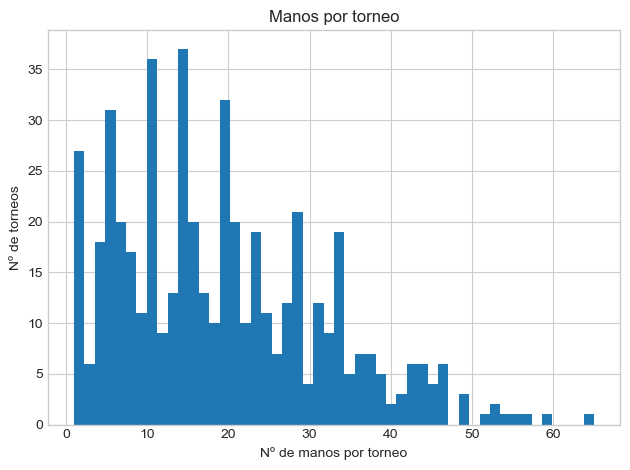

In [209]:

s = df.groupby("TournID")["HandID"].nunique()


plt.figure()
plt.hist(s.values, bins=50)   
plt.title("Manos por torneo")
plt.xlabel("Nº de manos por torneo")
plt.ylabel("Nº de torneos")
plt.tight_layout()
plt.show()


## Conclusión

### Conclusión (Parte 1: calidad del dato)

- **Nulos:** no se han detectado problemas relevantes en esta primera revisión (asumo datos correctos para continuar).
- **Outliers:** sí, aparecen **torneos excepcionalmente largos** (outliers superiores) al analizar **manos por torneo**.
- **Sesgo:** la distribución está **sesgada a la derecha** (cola larga), por lo que normalmente **media > mediana**.
- **Lectura general:** datos utilizables para el análisis, pero conviene tener en cuenta **outliers** y usar medidas **robustas** (mediana/IQR) cuando toque.

# PARTE 2: Inferencia y Modelado (Dataset Propio)

**Objetivo:** Descubrir relaciones entre variables y predecir resultados.

**Requisitos:**
1.  **Análisis de Correlación:** Genera una matriz de correlación y visualízala con un Heatmap. ¿Qué variables están más relacionadas con tu Target?
2.  **Relaciones Bivariantes:** Crea Scatter Plots para visualizar la relación entre las variables independientes más fuertes y tu variable objetivo.
3.  **Regresión Lineal (Scikit-Learn):**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

4. **Regresión logistica:**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

**📝 Conclusión:** ¿Es tu modelo capaz de predecir con precisión? ¿Qué variables son las más influyentes?¿Qué tipo de regresión es la más apropiada?

---------
  Amplía el análisis incorporando los siguientes aspectos:

- **Diagnóstico del modelo de regresión lineal**
  Analiza los residuos del modelo entrenado:
  - Distribución de los residuos
  - Relación entre residuos y valores predichos  
  Comenta si se cumplen los supuestos básicos del modelo.

- **Regresión logística: adecuación del modelo**
  Justifica si la regresión logística es apropiada para tu variable objetivo y discute las diferencias conceptuales con la regresión lineal.

- **Comparación de modelos**
  Compara brevemente el rendimiento y la idoneidad de ambos enfoques (lineal vs. logístico) más allá de las métricas numéricas.

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score, mean_squared_error,
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

## 2.1 Dataset a nivel torneo

Para que el modelado tenga sentido, primero creamos una tabla a nivel torneo (1 fila = 1 TournID) en lugar de a nivel mano

**Targets:**
- **Regresión lineal:** hands_per_tournament (cuántas manos dura un torneo).
- **Regresión logística:** long_tournament (1 si el torneo está en el 25% más largo, 0 si no).


In [211]:
# 1 fila por mano
df_hand = df.drop_duplicates(subset=["TournID", "HandID"]).copy()

# Convertimos AllIn a 0/1 
allin_cols = ["PreflopAllIn", "FlopAllIn", "TurnAllIn", "RiverAllIn"]
for col in allin_cols:
    if col in df_hand.columns:
        df_hand[col] = df_hand[col].astype(str).str.lower().isin(["1","true","t","yes","y"]).astype(int)

df_hand.shape

(9757, 31)

In [212]:
tourn = (
    df_hand.groupby("TournID")
      .agg(
          hands_per_tournament=("HandID", "nunique"),
          allin_pre=("PreflopAllIn", "sum"),
          allin_flop=("FlopAllIn", "sum"),
          allin_turn=("TurnAllIn", "sum"),
          allin_river=("RiverAllIn", "sum"),
      )
      .reset_index()
)

tourn["total_allins"] = tourn["allin_pre"] + tourn["allin_flop"] + tourn["allin_turn"] + tourn["allin_river"]

# torneo largo (>= percentil 75)
p75 = tourn["hands_per_tournament"].quantile(0.75)
tourn["long_tournament"] = (tourn["hands_per_tournament"] >= p75).astype(int)

print("Torneos:", len(tourn), "| p75 manos:", p75)
tourn.head()

Torneos: 506 | p75 manos: 27.75


,TournID,hands_per_tournament,allin_pre,allin_flop,allin_turn,allin_river,total_allins,long_tournament
0,3967132056,11,0,0,1,0,1,0
1,3967135175,14,2,0,0,0,2,0
2,3967136182,53,10,0,1,2,13,1
3,3967142397,7,1,0,0,0,1,0
4,3967142959,13,2,0,0,0,2,0


Creamos variables simples:
- hands_per_tournament: nº de manos del torneo (target lineal)
- total_allins: nº total de all-ins (variable explicativa)
- long_tournament: torneo largo (target logístico) usando percentil 75

## 2.2 Análisis de correlación (Heatmap)

Calculamos la matriz de correlación y vemos qué variables se relacionan más con el target lineal (`hands_per_tournament`).

Correlación con hands_per_tournament:
hands_per_tournament    1.000000
long_tournament         0.807641
total_allins            0.732351
allin_pre               0.708608
allin_river             0.214234
allin_flop              0.173658
allin_turn              0.122807
Name: hands_per_tournament, dtype: float64


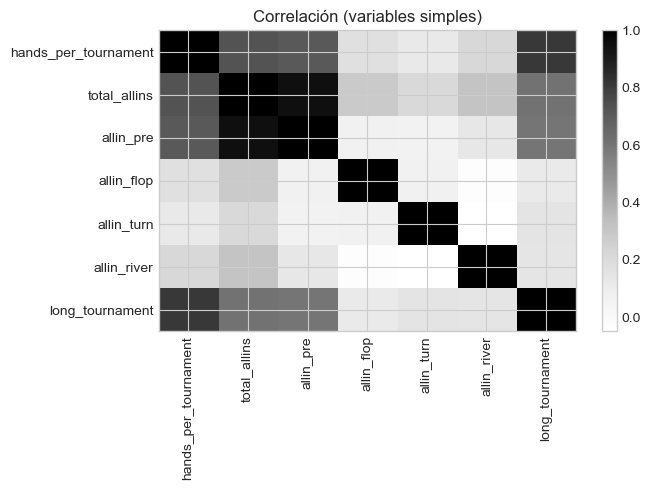

In [213]:
cols_corr = ["hands_per_tournament", "total_allins", "allin_pre", "allin_flop", "allin_turn", "allin_river", "long_tournament"]
corr = tourn[cols_corr].corr(numeric_only=True)

print("Correlación con hands_per_tournament:")
print(corr["hands_per_tournament"].sort_values(ascending=False))

plt.figure(figsize=(7,5))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.title("Correlación (variables simples)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.tight_layout()
plt.show()

## 2.3 Relaciones bivariantes (Scatter plots)

Mostramos la relación entre la variable explicativa (total_allins) y el target (hands_per_tournament).

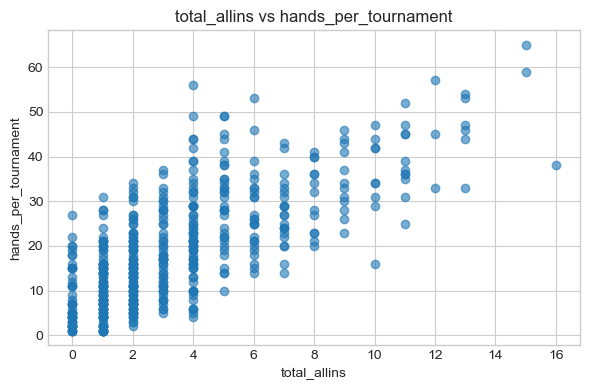

In [214]:
plt.figure(figsize=(6,4))
plt.scatter(tourn["total_allins"], tourn["hands_per_tournament"], alpha=0.6)
plt.title("total_allins vs hands_per_tournament")
plt.xlabel("total_allins")
plt.ylabel("hands_per_tournament")
plt.tight_layout()
plt.show()

## 2.4 Regresión lineal 

Entrenamos una regresión lineal para predecir hands_per_tournament.

Pasos:
1) Elegimos X y y  
2) Train/Test split 80/20  
3) Entrenamos el modelo  
4) Evaluamos con R² y RMSE

In [215]:
X = tourn[["total_allins"]].copy()
y = tourn["hands_per_tournament"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lin = LinearRegression()
lin.fit(X_train, y_train)

y_pred = lin.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2:", r2)
print("RMSE:", rmse)

R2: 0.5791468890692664
RMSE: 8.639979472646575


El modelo de regresión lineal obtiene un **R² = 0.58**, lo que significa que explica aproximadamente un **58%** de la variación en hands_per_tournament. El **RMSE = 8.64** indica que, de media, las predicciones se desvían unas **~9 manos** respecto al valor real. 

### Diagnóstico del modelo lineal (residuos)

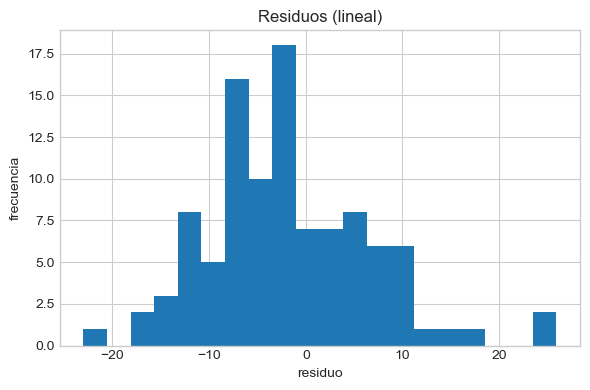

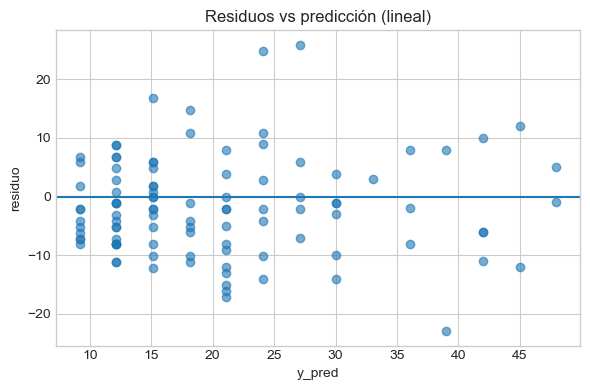

In [216]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=20)
plt.title("Residuos (lineal)")
plt.xlabel("residuo")
plt.ylabel("frecuencia")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0)
plt.title("Residuos vs predicción (lineal)")
plt.xlabel("y_pred")
plt.ylabel("residuo")
plt.tight_layout()
plt.show()

## 2.5 Regresión logística 

usamos **regresión logística** porque el objetivo `long_tournament` es **binario**:
- 1 = torneo largo
- 0 = torneo no largo

Entrenamos el modelo con un split **80/20** y evaluamos con:
- **Accuracy**
- **Matriz de confusión**
- **Classification report** (precision/recall/f1)

In [217]:
X = tourn[["total_allins"]].copy()
y = tourn["long_tournament"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

logit = LogisticRegression(max_iter=2000)
logit.fit(X_train, y_train)

y_class = logit.predict(X_test)

acc = accuracy_score(y_test, y_class)
print("Accuracy:", acc)
print("Confusion matrix:\n", confusion_matrix(y_test, y_class))
print("\nClassification report:\n", classification_report(y_test, y_class))

Accuracy: 0.8235294117647058
Confusion matrix:
 [[74  2]
 [16 10]]

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89        76
           1       0.83      0.38      0.53        26

    accuracy                           0.82       102
   macro avg       0.83      0.68      0.71       102
weighted avg       0.83      0.82      0.80       102



El modelo tiene **accuracy = 0.82** y funciona muy bien para la clase **0 (no largo)** (*recall* 0.97), pero detecta peor la clase **1 (largo)** (*recall* 0.38). 

## Conclusión  

Trabajando con una versión del dataset a nivel torneo (una fila por torneo), vemos que `total_allins` está relacionado con la duración del torneo. La **regresión lineal** da un resultado razonable (**R² = 0.58**, **RMSE ≈ 8.64**), así que puede estimar el número de manos, aunque todavía se equivoca de media en unas 9 manos. En la **regresión logística**, el modelo consigue **accuracy = 0.82**, pero le cuesta identificar los torneos largos (muchos se le escapan), lo que sugiere que tiende a predecir “no largo”.

## PARTE 3: Regresión Lineal "From Scratch" (Datos Simulados)

**Objetivo:** Demostrar que entiendes la matemática detrás de `LinearRegression()` implementándola con NumPy.

Amplia con:

- **Predicción y evaluación**
  Utiliza tu implementación para:
  - Realizar predicciones
  - Calcular manualmente el **MSE** y el **R²**, sin usar funciones de Scikit-Learn.

- **Comparación con Scikit-Learn**
  Entrena un modelo `LinearRegression()` sobre los mismos datos y compara:
  - Coeficientes
  - Métricas de evaluación  
  Discute posibles diferencias numéricas.


Intercepto estimado: 4.108776195995853
Pendiente estimada: 2.8629559308039347


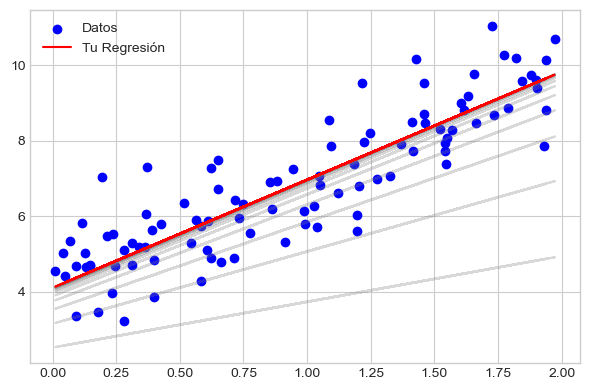

In [218]:
import numpy as np
import matplotlib.pyplot as plt

# --- NO TOCAR: GENERACIÓN DE DATOS ---
np.random.seed(42)
X_mock = 2 * np.random.rand(100, 1)
y_mock = 4 + 3 * X_mock + np.random.randn(100, 1)
# -----------------------------------

def evolve_linear_regression(X, y, iteraciones=16, eta=0.1):
    """
    Ajusta w (pendiente) y b (intercepto) con Gradient Descent usando NumPy.
    Returns: (b, w)
    """
    # Generación simple de parámetros iniciales
    w = np.random.randn()
    b = np.random.randn()

    n = len(X)

    for i in range(1, iteraciones + 1):
        # Predicción
        y_pred = b + w * X

        # Error
        error = y_pred - y

        # Gradientes (MSE)
        dw = (2/n) * np.sum(error * X)
        db = (2/n) * np.sum(error)

        # Actualizar parámetros
        w = w - eta * dw
        b = b - eta * db

        # Pintar recta (gris) para ver la evolución
        pintar_recta(b, w, X)

    return b, w


def pintar_recta(b, w, X):
    plt.plot(X, b + w * X, color='gray', alpha=0.3)


# Probemos tu función
plt.figure(figsize=(6, 4))
b, w = evolve_linear_regression(X_mock, y_mock)
print(f"Intercepto estimado: {b}")
print(f"Pendiente estimada: {w}")

# Verificación visual
plt.scatter(X_mock, y_mock, color='blue', label='Datos')
plt.plot(X_mock, b + w * X_mock, color='red', label='Tu Regresión')
plt.legend()
plt.tight_layout()
plt.show()

In [219]:
# Predicciones
y_pred = b + w * X_mock

# MSE manual
mse = np.mean((y_mock - y_pred) ** 2)

# R² manual
ss_res = np.sum((y_mock - y_pred) ** 2)
ss_tot = np.sum((y_mock - np.mean(y_mock)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print("MSE (manual):", mse)
print("R2 (manual):", r2)

MSE (manual): 0.8099669833744372
R2 (manual): 0.7683059879437648


In [220]:
model = LinearRegression()
model.fit(X_mock, y_mock)

b_sk = model.intercept_[0]
w_sk = model.coef_[0][0]

y_pred_sk = model.predict(X_mock)

print("Mi modelo -> b:", b, "w:", w, "MSE:", mse, "R2:", r2)
print("Sklearn   -> b:", b_sk, "w:", w_sk, "MSE:", mean_squared_error(y_mock, y_pred_sk), "R2:", r2_score(y_mock, y_pred_sk))

Mi modelo -> b: 4.108776195995853 w: 2.8629559308039347 MSE: 0.8099669833744372 R2: 0.7683059879437648
Sklearn   -> b: 4.215096157546747 w: 2.7701133864384837 MSE: 0.8065845639670531 R2: 0.7692735413614223


Los parámetros y métricas obtenidos son muy parecidos a Scikit-Learn; las pequeñas diferencias se deben al número de iteraciones y a la tasa de aprendizaje.

## PARTE 4: Series Temporales (Datos Simulados)

**Objetivo:** Analizar tendencias y estacionalidad en una serie temporal generada.

**Tareas:**
1.  Convierte el índice a formato DateTime.
2.  Haz un resampleo mensual (`'M'`) mostrando la media de ventas.
3.  Calcula una **Media Móvil** de 3 meses para suavizar la curva.
4.  Usa `seasonal_decompose` para visualizar los componentes (Tendencia, Estacionalidad y ruido).

---

Amplia Con:

- **Generación de la serie**
  Describe brevemente cómo se ha generado la serie temporal simulada, indicando si incluye tendencia, estacionalidad y ruido.

- **Comparación de suavizados**
  Calcula una segunda media móvil con una ventana distinta y compara visualmente ambos suavizados. Comenta las diferencias observadas.

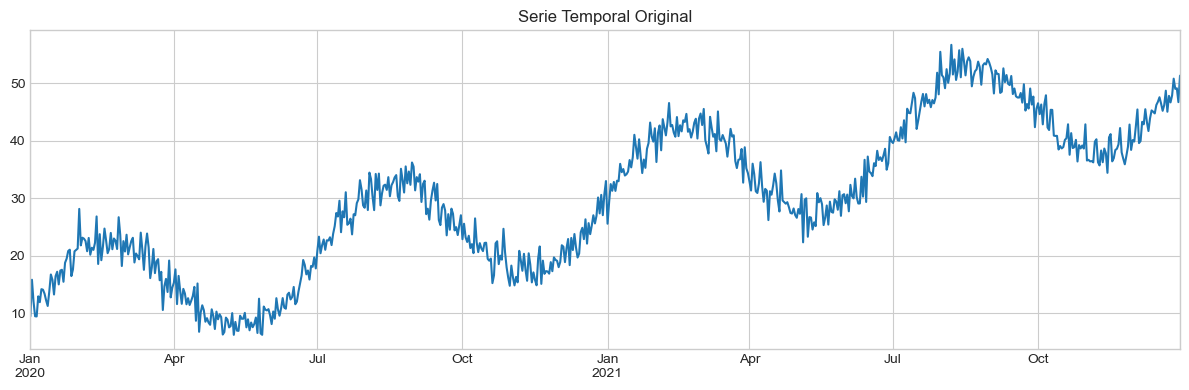

/var/folders/p5/3kcgnzhx0xl617mnx2xfxl380000gn/T/ipykernel_3319/1258248649.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = ts_df['Sales'].resample('M').mean()


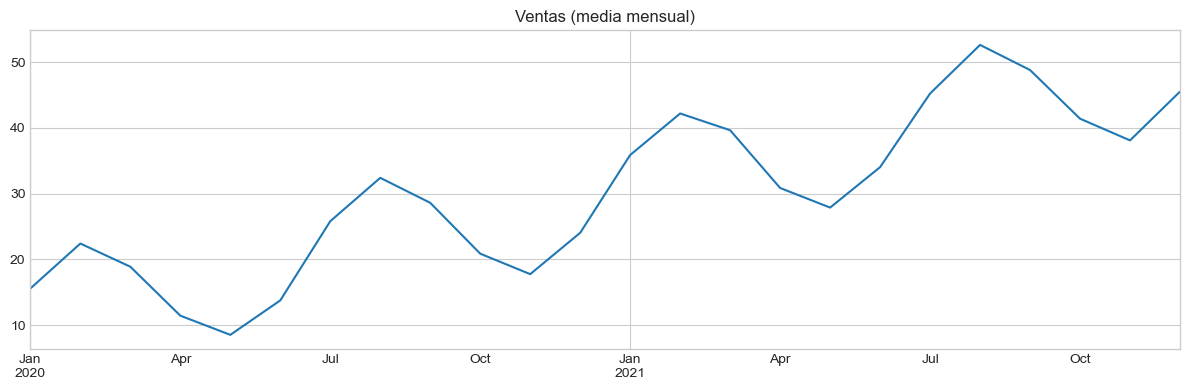

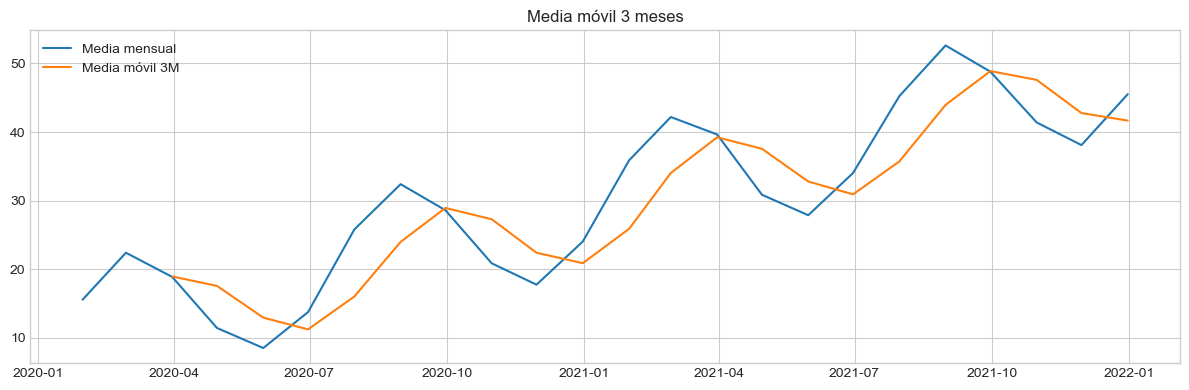

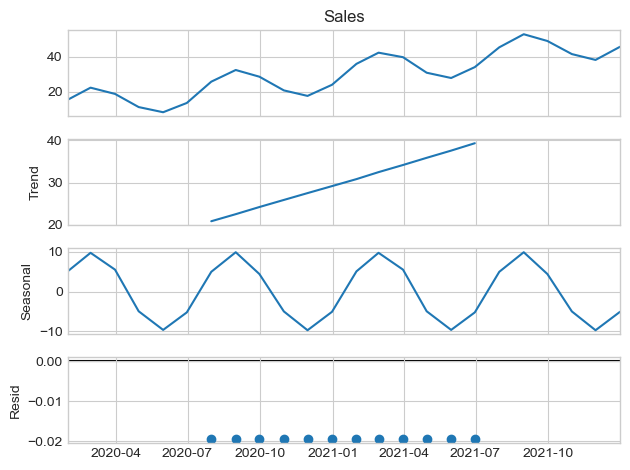

In [221]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- NO TOCAR: GENERACIÓN DE DATOS TEMPORALES ---
dates = pd.date_range(start='2020-01-01', periods=365*2, freq='D')
values = np.linspace(10, 50, len(dates)) + 10 * np.sin(np.linspace(0, 3.14*8, len(dates))) + np.random.normal(0, 2, len(dates))
ts_df = pd.DataFrame({'Sales': values}, index=dates)
# -----------------------------------------------

# 1) Índice a DateTime (por si acaso)
ts_df.index = pd.to_datetime(ts_df.index)

# 1. Plot inicial
ts_df['Sales'].plot(title='Serie Temporal Original', figsize=(12,4))
plt.tight_layout()
plt.show()

# 2. Resampleo Mensual (media)
monthly_sales = ts_df['Sales'].resample('M').mean()
monthly_sales.plot(title='Ventas (media mensual)', figsize=(12,4))
plt.tight_layout()
plt.show()

# 3. Media Móvil (3 meses) -> sobre la serie mensual
moving_avg_3m = monthly_sales.rolling(window=3).mean()
plt.figure(figsize=(12,4))
plt.plot(monthly_sales, label='Media mensual')
plt.plot(moving_avg_3m, label='Media móvil 3M')
plt.title('Media móvil 3 meses')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Descomposición (serie mensual, periodo anual = 12)
result = seasonal_decompose(monthly_sales, model='additive', period=12)
result.plot()
plt.tight_layout()
plt.show()
